# Recursive classification of satellite imaging time series: An application to water and land cover mapping
For details on the installation procedure, please check the `README.md` file of this project.

In [ ]:
import random
import os

from plot_results.plot_results_classification import ClassificationResultsFigure
from plot_results.plot_results_sensitivity_analysis import plot_results_sensitivity_analysis
from configuration import Config, Debug
from image_reader import ReadSentinel2
from training import training_main
from evaluation import evaluation_main
from datetime import datetime

### Download Dataset
Download our dataset *Sentinel-2 Images from Oroville Dam and Charles River* from [this Zenodo link](https://zenodo.org/record/6999172#.YzWyndjMI2x) and extract the `.zip` file.
In `configuration.py` (class `Config`), change `path_zenodo` to the path where the Zenodo folder has been stored. Images in this dataset are used for
training and evaluation. Details regarding the dataset can be found in the Zenodo link.

### Configuration
Consider changing the configuration settings from the `configuration.py` script as desired. Some configuration settings must be changed when executing the code with data that is different to the one provided by the authors. To help the user reproduce the results presented in the manuscript, some configuration settings are changed in this Jupyter Notebook file.

Change the `Config.path_zenodo` setting to the path where the folder downloaded from Zenodo has been stored.

In [ ]:
Config.path_zenodo = r"/Users/helena/Documents/Zenodo_RBC"  # CHANGE

Run the following to update paths with respect to the Zenodo folder path.

In [ ]:
Config.path_evaluation_results = os.path.join(Config.path_zenodo, "evaluation_results")
Config.path_sentinel_images = os.path.join(Config.path_zenodo, "Sentinel2_data")
Config.path_results_figures = os.path.join(Config.path_zenodo, 'results_figures')
Config.path_watnet_pretrained_model = os.path.join(os.getcwd(), r"benchmark_models/watnet/model/pretrained/watnet.h5")
Config.path_log_files = os.path.join(Config.path_zenodo, 'log')
Config.path_trained_models = os.path.join(os.getcwd(), "trained_models")

### Debugging Options

Set the following configuration options to `True` if wanting to train the GMM and LR models. The trained models will be stored in pickle format in the `Config.path_trained_models` folder and will be used for evaluation. If the user wants to use already trained models, the following options must be set to False. Pre-trained models with the configuration used to reproduce results from the manuscript are provided in this repository (see the folder `trained_models`).

In [ ]:
Config.gmm_dump_pickle = False  # False if wanting to use a stored pretrained model for GMM
# True if wanting to train the GMM model
Config.trained_lr_model_pickle = False  # False if wanting to use a stored pretrained model for LR
# True if wanting to train the LR model

## Water Mapping Experiment
Run the code in this section to reproduce results from Figures 5 and 6 in the manuscript, which show evaluation results for Study Areas A and B in the following image. Models have been trained with the area covered by training region 1 in the following image.

![Study Area Water Mapping](readme_figures/study_area_water_mapping.png)

In [29]:
# Configure the scenario
Config.scenario = "oroville_dam"

# Initialize random seed
random.seed(1)

# Set logging path
Debug.set_logging_file(time_now=datetime.now())

# Instance of Image Reader object
image_reader = ReadSentinel2(Config.image_dimensions[Config.scenario]['dim_x'],
                             Config.image_dimensions[Config.scenario]['dim_y'])

### Training (Study Region 1)

In [ ]:
# Training Stage
labels, gmm_densities, trained_lr_model = training_main(image_reader)

### Evaluation (Study Area A)
If wanting to generate and plot new evaluation results, follow these steps. If wanting to plot already stored results without the need of going through the evaluation stage again, skip to the section after `Evaluation Main`.

In [30]:
# Evaluation Stage
# scene_id = 1 for scene A in Oroville Dam (water stream)
Config.scene_id = 1
Config.evaluation_generate_results = True # Only set to False for debugging purposes (not recommended)

##### (Optional) Store results
In order to store evaluation results with pickle in the `Config.evaluation_results/classification` folder, `Config.evaluation_store_results` must be set to `True`. Results are saved only for the images with index specified in the `Config.index_images_to_store` setting. Saving results allows to directly plot figures without the need to go through the evaluation stage again.

<font color='red'>Important note:</font> Given the large size of images under evaluation, evaluation results may occupy a lot of storage. Pickle file sizes are 600 MB for each evaluated date in the water mapping experiment and 90 MB in the land cover experiment. If storing evaluation results obtained with all dates, 50 GB are required for each water mapping experiment and 5 GB for each land cover experiment. Consider the option to not store evaluation results to save storage.

In [ ]:
Config.evaluation_store_results = True
# If wanting to store results obtained with all dates (consider the previous important note regarding big file sizes):
#Config.index_images_to_store = {2: [*range(Config.offset_eval_images, 42, 1)], 1: [*range(Config.offset_eval_images, 42, 1)], 3: [*range(Config.offset_eval_images, 28, 1)]}
# If wanting to store only results to reproduce Figure 5 (these results are already provided in the Zenodo folder):
Config.index_images_to_store = {1: [1, 5, 9, 13, 17, 21, 25, 29, 33, 37, 41], 2: [1, 5, 9, 13, 17, 21, 25, 29, 33, 37, 41], 3: [1, 5, 9, 13, 17, 21, 25]}

##### (Optional) Specify which results to show after evaluation
The user can specify which results to plot right after finishing the evaluation stage (without the need to store data).

In [ ]:
# If wanting to plot all dates:
#Config.index_images_to_evaluate = {2: [*range(Config.offset_eval_images, 42, 1)], 1: [*range(Config.offset_eval_images, 42, 1)], 3: [*range(Config.offset_eval_images, 28, 1)]}
# If wanting to reproduce Figure 5:
Config.index_images_to_evaluate = {1: [1, 5, 9, 13, 17, 21, 25, 29, 33, 37, 41], 2: [1, 5, 9, 13, 17, 21, 25, 29, 33, 37, 41], 3: [1, 5, 9, 13, 17, 21, 25]}

# Set the following setting to True if wanting to save in pdf format the generated figure with results
Debug.save_figures = True

##### Evaluation Main
The following line of code calls the evaluation main function. <font color='red'>Tensorflow warnings do not affect results.</font>

In [ ]:
# Evaluation stage
evaluation_main(gmm_densities, trained_lr_model, image_reader)

##### (Optional) Plot previously stored results
If results have been previously stored, it is not necessary to go through the evaluation stage again to see the figures.

Results for Oroville Dam, k = 1
Results for Oroville Dam, k = 1
Image with index 1 from date 2020/10/26 (band 2)
Image with index 1 from date 2020/10/26 (band 3)
Image with index 1 from date 2020/10/26 (band 4)
Image with index 1 from date 2020/10/26 (band 8A)
Image with index 1 from date 2020/10/26 (band 8)
Image with index 1 from date 2020/10/26 (band 11)
/Users/helena/Documents/Zenodo_RBC/evaluation_results/classification/oroville_dam_1/oroville_dam_1_image_1_epsilon_0.05_norm_constant_0.3.pkl
Image with index 5 from date 2020/11/25 (band 2)
Image with index 5 from date 2020/11/25 (band 3)
Image with index 5 from date 2020/11/25 (band 4)
Image with index 5 from date 2020/11/25 (band 8A)
Image with index 5 from date 2020/11/25 (band 8)
Image with index 5 from date 2020/11/25 (band 11)
/Users/helena/Documents/Zenodo_RBC/evaluation_results/classification/oroville_dam_1/oroville_dam_1_image_5_epsilon_0.05_norm_constant_0.3.pkl
Image with index 9 from date 2020/12/30 (band 2)
Image with 

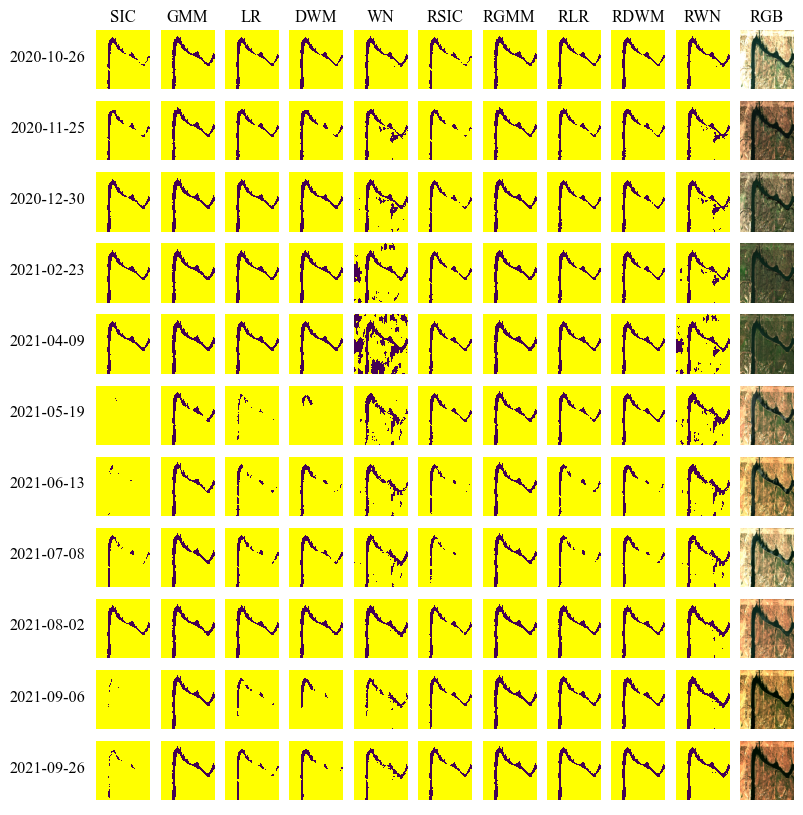

In [31]:
# If wanting to plot all dates:
#Config.index_images_to_evaluate = {2: [*range(Config.offset_eval_images, 42, 1)], 1: [*range(Config.offset_eval_images, 42, 1)], 3: [*range(Config.offset_eval_images, 28, 1)]}
# If wanting to reproduce Figure 5:
Config.index_images_to_evaluate = {1: [1, 5, 9, 13, 17, 21, 25, 29, 33, 37, 41], 2: [1, 5, 9, 13, 17, 21, 25, 29, 33, 37, 41], 3: [1, 5, 9, 13, 17, 21, 25]}

# Plot Results
# Set the following setting to True if wanting to save in pdf format the generated figure with results
Debug.save_figures = True
results_figure = ClassificationResultsFigure()
results_figure.create_figure()
results_figure.plot_stored_results()

 ### Evaluation (Study Area B)

In [32]:
# Evaluation Stage
# scene_id = 2 for scene B in Oroville Dam (peninsula)
Config.scene_id = 2
Config.evaluation_generate_results = True # Only set to False for debugging purposes (not recommended)

##### (Optional) Store results

In [33]:
Config.evaluation_store_results = True
# If wanting to store results obtained with all dates (consider the previous important note regarding big file sizes):
#Config.index_images_to_store = {2: [*range(Config.offset_eval_images, 42, 1)], 1: [*range(Config.offset_eval_images, 42, 1)], 3: [*range(Config.offset_eval_images, 28, 1)]}
#If wanting to store only results to reproduce Figure 5 (these results are already provided in the Zenodo folder):
Config.index_images_to_store = {1: [1, 5, 9, 13, 17, 21, 25, 29, 33, 37, 41], 2: [1, 5, 9, 13, 17, 21, 25, 29, 33, 37, 41], 3: [1, 5, 9, 13, 17, 21, 25]}

##### (Optional) Specify which results to show after evaluation

In [ ]:
# If wanting to plot all dates:
#Config.index_images_to_evaluate = {2: [*range(Config.offset_eval_images, 42, 1)], 1: [*range(Config.offset_eval_images, 42, 1)], 3: [*range(Config.offset_eval_images, 28, 1)]}
# If wanting to reproduce Figure 5:
Config.index_images_to_evaluate = {1: [1, 5, 9, 13, 17, 21, 25, 29, 33, 37, 41], 2: [1, 5, 9, 13, 17, 21, 25, 29, 33, 37, 41], 3: [1, 5, 9, 13, 17, 21, 25]}

# Set the following setting to True if wanting to save in pdf format the generated figure with results
Debug.save_figures = True

##### Evaluation Main

<font color='red'>Tensorflow warnings do not affect results.</font>

In [ ]:
# Evaluation stage
evaluation_main(gmm_densities, trained_lr_model, image_reader)

##### (Optional) Plot previously stored results

Results for Oroville Dam, k = 2
Results for Oroville Dam, k = 2
Image with index 1 from date 2020/10/26 (band 2)
Image with index 1 from date 2020/10/26 (band 3)
Image with index 1 from date 2020/10/26 (band 4)
Image with index 1 from date 2020/10/26 (band 8A)
Image with index 1 from date 2020/10/26 (band 8)
Image with index 1 from date 2020/10/26 (band 11)
/Users/helena/Documents/Zenodo_RBC/evaluation_results/classification/oroville_dam_2/oroville_dam_2_image_1_epsilon_0.05_norm_constant_0.3.pkl
Image with index 5 from date 2020/11/25 (band 2)
Image with index 5 from date 2020/11/25 (band 3)
Image with index 5 from date 2020/11/25 (band 4)
Image with index 5 from date 2020/11/25 (band 8A)
Image with index 5 from date 2020/11/25 (band 8)
Image with index 5 from date 2020/11/25 (band 11)
/Users/helena/Documents/Zenodo_RBC/evaluation_results/classification/oroville_dam_2/oroville_dam_2_image_5_epsilon_0.05_norm_constant_0.3.pkl
Image with index 9 from date 2020/12/30 (band 2)
Image with 

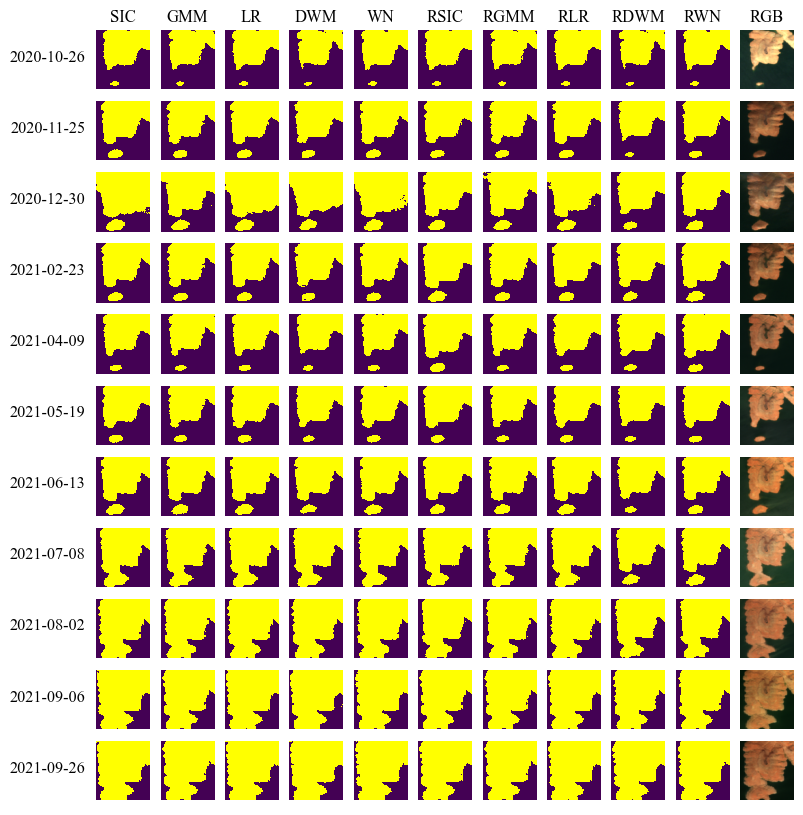

In [34]:
# If wanting to plot all dates:
#Config.index_images_to_evaluate = {2: [*range(Config.offset_eval_images, 42, 1)], 1: [*range(Config.offset_eval_images, 42, 1)], 3: [*range(Config.offset_eval_images, 28, 1)]}
# If wanting to reproduce Figure 5:
Config.index_images_to_evaluate = {1: [1, 5, 9, 13, 17, 21, 25, 29, 33, 37, 41], 2: [1, 5, 9, 13, 17, 21, 25, 29, 33, 37, 41], 3: [1, 5, 9, 13, 17, 21, 25]}

# Plot Results
# Set the following setting to True if wanting to save in pdf format the generated figure with results
Debug.save_figures = True
results_figure = ClassificationResultsFigure()
results_figure.create_figure()
results_figure.plot_stored_results()

## Land Cover Classification
![Study Area Land Cover Classification](readme_figures/study_area_land_cover.png)

In [35]:
# Configure the scenario
Config.scenario = "charles_river"

# Initialize random seed
random.seed(1)

# Set logging path
Debug.set_logging_file(time_now=datetime.now())

# Instance of Image Reader object
image_reader = ReadSentinel2(Config.image_dimensions[Config.scenario]['dim_x'],
                             Config.image_dimensions[Config.scenario]['dim_y'])

### Training (Study Region 2)

In [ ]:
# Training Stage
labels, gmm_densities, trained_lr_model = training_main(image_reader)

### Evaluation (Study Area C)

In [36]:
# Evaluation Stage
# scene_id = 3 for scene C (Charles River)
Config.scene_id = 3
Config.evaluation_generate_results = True # Only set to False for debugging purposes (not recommended)

##### (Optional) Store results

In [ ]:
Config.evaluation_store_results = True
# If wanting to store results obtained with all dates (consider the previous important note regarding big file sizes):
#Config.index_images_to_store = {2: [*range(Config.offset_eval_images, 42, 1)], 1: [*range(Config.offset_eval_images, 42, 1)], 3: [*range(Config.offset_eval_images, 28, 1)]}
# If wanting to store only results to reproduce Figure 5 (these results are already provided in the Zenodo folder):
Config.index_images_to_store = {1: [1, 5, 9, 13, 17, 21, 25, 29, 33, 37, 41], 2: [1, 5, 9, 13, 17, 21, 25, 29, 33, 37, 41], 3: [1, 5, 9, 13, 17, 21, 25]}

##### (Optional) Specify which results to show after evaluation

In [ ]:
# If wanting to plot all dates:
#Config.index_images_to_evaluate = {2: [*range(Config.offset_eval_images, 42, 1)], 1: [*range(Config.offset_eval_images, 42, 1)], 3: [*range(Config.offset_eval_images, 28, 1)]}
# If wanting to reproduce Figure 5:
Config.index_images_to_evaluate = {1: [1, 5, 9, 13, 17, 21, 25, 29, 33, 37, 41], 2: [1, 5, 9, 13, 17, 21, 25, 29, 33, 37, 41], 3: [1, 5, 9, 13, 17, 21, 25]}

# Set the following setting to True if wanting to save in pdf format the generated figure with results
Debug.save_figures = True

##### Evaluation Main

<font color='red'>Tensorflow warnings do not affect results.</font>

In [ ]:
# Evaluation stage
evaluation_main(gmm_densities, trained_lr_model, image_reader)

##### (Optional) Plot previously stored results

Results for Charles River, Study Area C
Results for Charles River, Study Area C
Image with index 1 from date 2020/11/08 (band 2)
Image with index 1 from date 2020/11/08 (band 3)
Image with index 1 from date 2020/11/08 (band 4)
Image with index 1 from date 2020/11/08 (band 8A)
Image with index 1 from date 2020/11/08 (band 8)
Image with index 1 from date 2020/11/08 (band 11)
/Users/helena/Documents/Zenodo_RBC/evaluation_results/classification/charles_river_3/charles_river_3_image_1_epsilon_0.05.pkl
Image with index 5 from date 2020/12/13 (band 2)
Image with index 5 from date 2020/12/13 (band 3)
Image with index 5 from date 2020/12/13 (band 4)
Image with index 5 from date 2020/12/13 (band 8A)
Image with index 5 from date 2020/12/13 (band 8)
Image with index 5 from date 2020/12/13 (band 11)
/Users/helena/Documents/Zenodo_RBC/evaluation_results/classification/charles_river_3/charles_river_3_image_5_epsilon_0.05.pkl
Image with index 9 from date 2021/03/20 (band 2)
Image with index 9 from dat

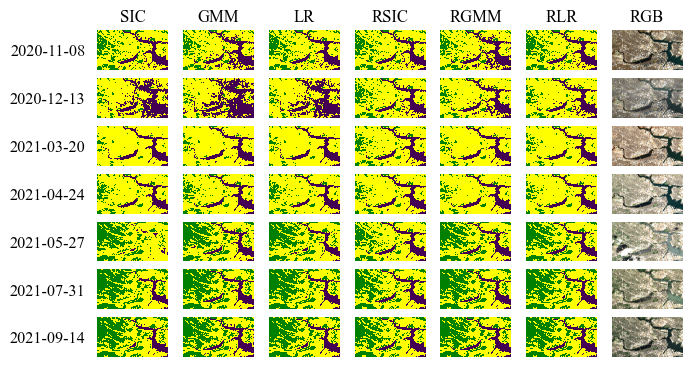

In [37]:
# If wanting to plot all dates:
#Config.index_images_to_evaluate = {2: [*range(Config.offset_eval_images, 42, 1)], 1: [*range(Config.offset_eval_images, 42, 1)], 3: [*range(Config.offset_eval_images, 28, 1)]}
# If wanting to reproduce Figure 5:
Config.index_images_to_evaluate = {1: [1, 5, 9, 13, 17, 21, 25, 29, 33, 37, 41], 2: [1, 5, 9, 13, 17, 21, 25, 29, 33, 37, 41], 3: [1, 5, 9, 13, 17, 21, 25]}

# Plot Results
# Set the following setting to True if wanting to save in pdf format the generated figure with results
Debug.save_figures = True
results_figure = ClassificationResultsFigure()
results_figure.create_figure()
results_figure.plot_stored_results()

## Sensitivity Analysis

sensitivity_analysis_epsilon_0.40
/Users/helena/Documents/Zenodo_RBC/evaluation_results/sensitivity_analysis/sensitivity_analysis_epsilon_0.40/sensitivity_analysis_epsilon_0.4_image_index_0.pkl
0
/Users/helena/Documents/Zenodo_RBC/evaluation_results/sensitivity_analysis/sensitivity_analysis_epsilon_0.40/sensitivity_analysis_epsilon_0.4_image_index_1.pkl
1
/Users/helena/Documents/Zenodo_RBC/evaluation_results/sensitivity_analysis/sensitivity_analysis_epsilon_0.40/sensitivity_analysis_epsilon_0.4_image_index_2.pkl
2
/Users/helena/Documents/Zenodo_RBC/evaluation_results/sensitivity_analysis/sensitivity_analysis_epsilon_0.40/sensitivity_analysis_epsilon_0.4_image_index_3.pkl
3
/Users/helena/Documents/Zenodo_RBC/evaluation_results/sensitivity_analysis/sensitivity_analysis_epsilon_0.40/sensitivity_analysis_epsilon_0.4_image_index_4.pkl
4
/Users/helena/Documents/Zenodo_RBC/evaluation_results/sensitivity_analysis/sensitivity_analysis_epsilon_0.40/sensitivity_analysis_epsilon_0.4_image_index_5.

/Users/helena/PycharmProjects/RBC-SatImg/plot_results/plot_results_sensitivity_analysis.py:87: UserWarning: FixedFormatter should only be used together with FixedLocator
  axarr[idx_model].set_xticklabels(axarr[idx_model].get_xticklabels(), rotation=45, ha="right", fontsize=13, family='Times New Roman')
/Users/helena/PycharmProjects/RBC-SatImg/plot_results/plot_results_sensitivity_analysis.py:87: UserWarning: FixedFormatter should only be used together with FixedLocator
  axarr[idx_model].set_xticklabels(axarr[idx_model].get_xticklabels(), rotation=45, ha="right", fontsize=13, family='Times New Roman')
/Users/helena/PycharmProjects/RBC-SatImg/plot_results/plot_results_sensitivity_analysis.py:87: UserWarning: FixedFormatter should only be used together with FixedLocator
  axarr[idx_model].set_xticklabels(axarr[idx_model].get_xticklabels(), rotation=45, ha="right", fontsize=13, family='Times New Roman')


AttributeError: type object 'Config' has no attribute 'path_figures'

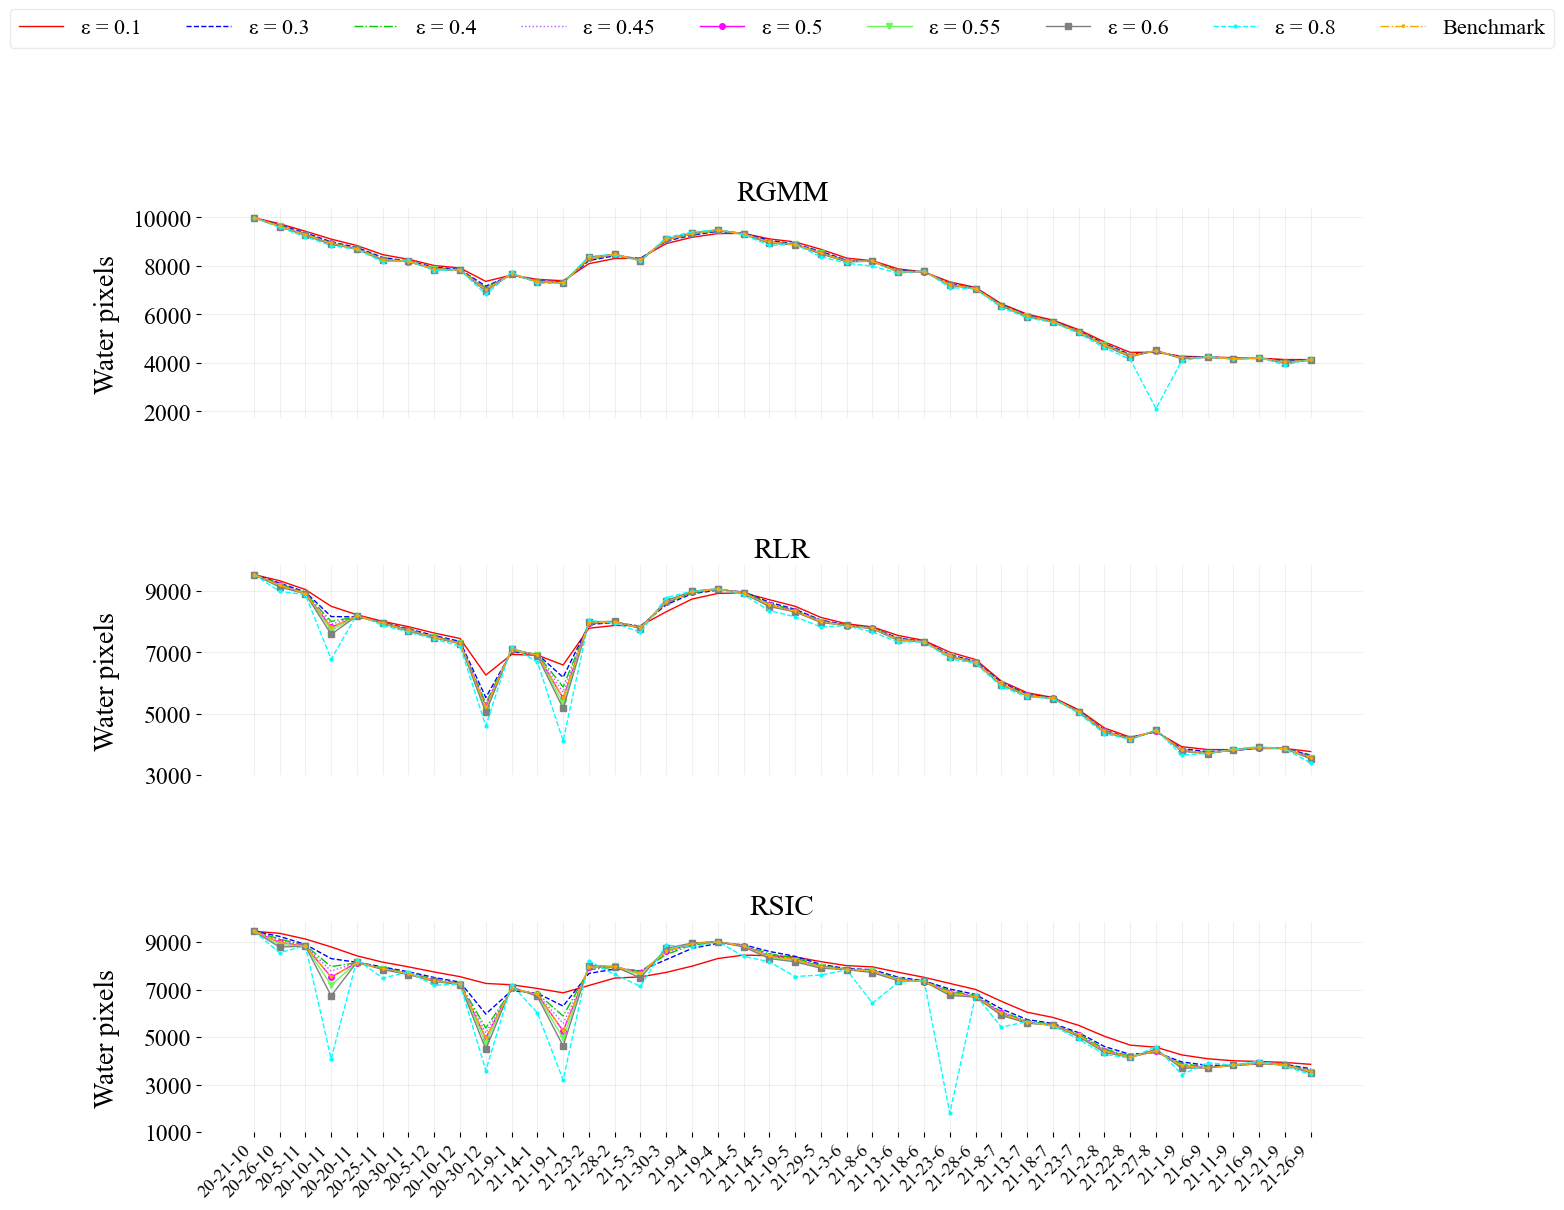

In [38]:
Debug.save_figures = True
plot_results_sensitivity_analysis()

## Authors
* Helena Calatrava (1)
* Bhavya Duvvuri (2)
* Haoqing Li (1)
* Ricardo Borsoi (3)
* Tales Imbiriba (1)
* Edward Beighley (2)
* Deniz Erdogmus (1)
* Pau Closas (1)

(1): Signal Processing, Imaging, Reasoning and Learning (SPIRAL) at
Northeastern University, Boston (MA).

(2): The Beighley Lab (Sustainable Water Resources | Resilient Wet Infrastructure) at Northeastern
University, Boston (MA).

(3): CRAN, University of Lorraine, CNRS, Vandoeuvre-les-Nancy, F-54000, France.

Please contact the following email address if having questions regarding the code:

<img alt="Study Area Water Mapping" src="readme_figures/address.png" width="400"/>

